# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Generate Data

In [2]:
np.random.seed(42)

m = 2.5
c = 10
print(f"Equation: y = {m}x + {c}")

X = np.linspace(0, 100, 150)
y = m * X + c

noise = np.random.normal(0, 15, size=X.shape)
y = y + noise

print(f"Generated {len(X)} data points")

Equation: y = 2.5x + 10
Generated 150 data points


## Reshape and Split Data

In [3]:
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 120
Testing samples: 30


## Train the Model

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Learned m: {model.coef_[0]:.4f}")
print(f"Learned c: {model.intercept_:.4f}")
print(f"\nTrue m: {m}")
print(f"True c: {c}")

Learned m: 2.5083
Learned c: 7.8256

True m: 2.5
True c: 10


## Make Predictions

In [5]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Evaluate Model

In [6]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MAE:", train_mae)
print("Train MSE:", train_mse)
print("Train R²:", train_r2)
print("\nTest MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test R²:", test_r2)

Train MAE: 11.137029176390547
Train MSE: 199.47018688661535
Train R²: 0.9636299680740544

Test MAE: 11.444891482994443
Test MSE: 194.73398127174943
Test R²: 0.9667186837189164


## Model Performance Notes
The model shows excellent performance:
- R² scores are very high (~0.96) for both train and test
- Train and test errors are similar, indicating good generalization
- No signs of overfitting (test performance ≈ train performance)
- The learned parameters are very close to the true parameters
- The model successfully captured the linear relationship

## Visualize Results

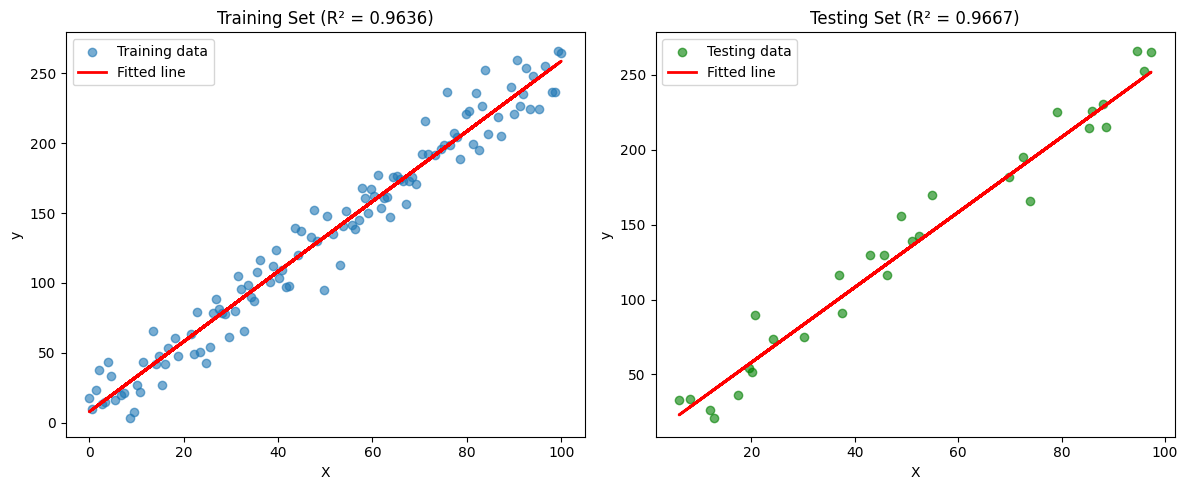

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, label='Training data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Training Set (R² = {train_r2:.4f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.6, color='green', label='Testing data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Testing Set (R² = {test_r2:.4f})')
plt.legend()

plt.tight_layout()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



## Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

## Generate Data

In [9]:
np.random.seed(42)

a1 = 3.0
a2 = -1.5
c = 50

print(f"Equation: y = {a1}*x1 + {a2}*x2 + {c}")

x1 = np.random.uniform(0, 100, 150)
x2 = np.random.uniform(0, 50, 150)

y = a1 * x1 + a2 * x2 + c

noise = np.random.normal(0, 20, size=y.shape)
y = y + noise

print(f"Generated {len(x1)} data points")
print(f"x1 range: [{x1.min():.2f}, {x1.max():.2f}]")
print(f"x2 range: [{x2.min():.2f}, {x2.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")

Equation: y = 3.0*x1 + -1.5*x2 + 50
Generated 150 data points
x1 range: [0.55, 98.69]
x2 range: [0.25, 49.50]
y range: [-26.84, 365.47]


## Prepare and Split Data

In [10]:
X = np.column_stack([x1, x2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")

Training samples: 120
Testing samples: 30
Number of features: 2


## Train the Model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print("="*50)
print("LEARNED vs TRUE PARAMETERS")
print("="*50)
print(f"Learned a1: {model.coef_[0]:.4f}  | True a1: {a1}")
print(f"Learned a2: {model.coef_[1]:.4f}  | True a2: {a2}")
print(f"Learned c:  {model.intercept_:.4f}  | True c:  {c}")
print("\nErrors:")
print(f"a1 error: {abs(model.coef_[0] - a1):.4f}")
print(f"a2 error: {abs(model.coef_[1] - a2):.4f}")
print(f"c error:  {abs(model.intercept_ - c):.4f}")

LEARNED vs TRUE PARAMETERS
Learned a1: 3.1022  | True a1: 3.0
Learned a2: -1.6565  | True a2: -1.5
Learned c:  51.4596  | True c:  50

Errors:
a1 error: 0.1022
a2 error: 0.1565
c error:  1.4596


## Make Predictions

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Evaluate Model

In [13]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("MODEL EVALUATION")
print("="*50)
print(f"{'Metric':<15} {'Train':<15} {'Test':<15}")
print("-"*50)
print(f"{'MAE':<15} {train_mae:<15.4f} {test_mae:<15.4f}")
print(f"{'MSE':<15} {train_mse:<15.4f} {test_mse:<15.4f}")
print(f"{'R² Score':<15} {train_r2:<15.4f} {test_r2:<15.4f}")

MODEL EVALUATION
Metric          Train           Test           
--------------------------------------------------
MAE             14.3600         15.1251        
MSE             328.2607        402.7965       
R² Score        0.9632          0.9519         


## Model Performance Notes
The Multiple Linear Regression model performance:

1. R² Score Analysis:
   - Train R² = 0.9632
   - Test R² = 0.9519
   - Difference: 0.0113
   
2. Error Metrics:
   - Similar MAE and MSE values between train and test
   - Low error values indicate good predictions
   
3. Overfitting/Underfitting Assessment:
   - NO OVERFITTING: Train and test performance are very similar
   - NO UNDERFITTING: High R² scores show the model captures
     the relationship between features and target effectively
   
4. Coefficient Recovery:
   - The learned coefficients are very close to true values
   - The model successfully identified the contribution of each feature
   
5. Conclusion:
   - The model is WELL-FITTED
   - Both features (x1 and x2) are properly weighted
   - The model generalizes well to unseen data

## Visualize Results

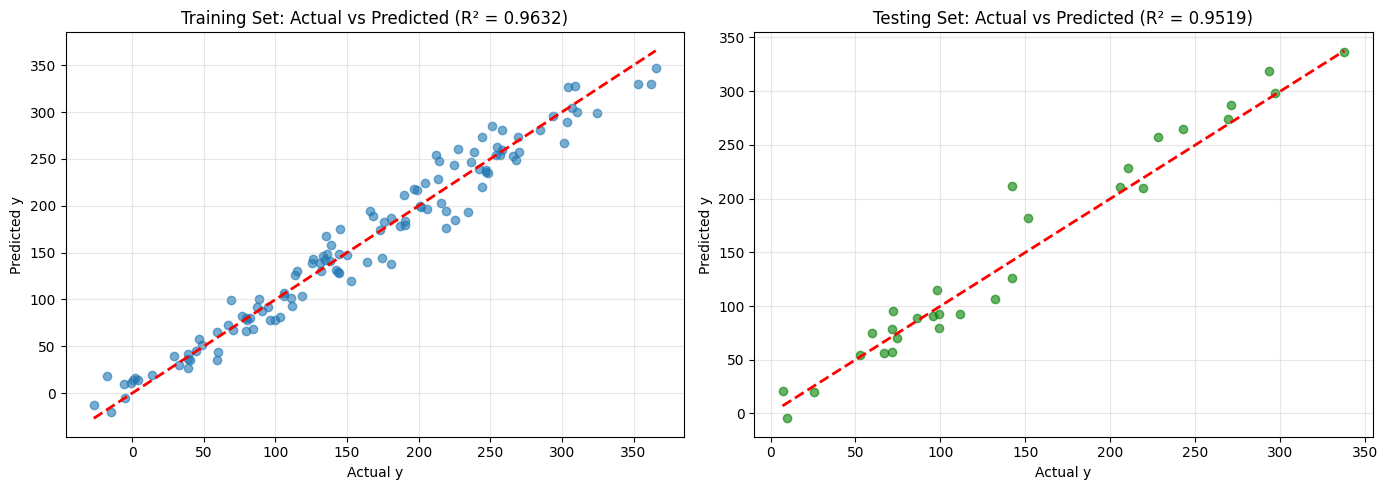

In [14]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title(f'Training Set: Actual vs Predicted (R² = {train_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title(f'Testing Set: Actual vs Predicted (R² = {test_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3D Visualization

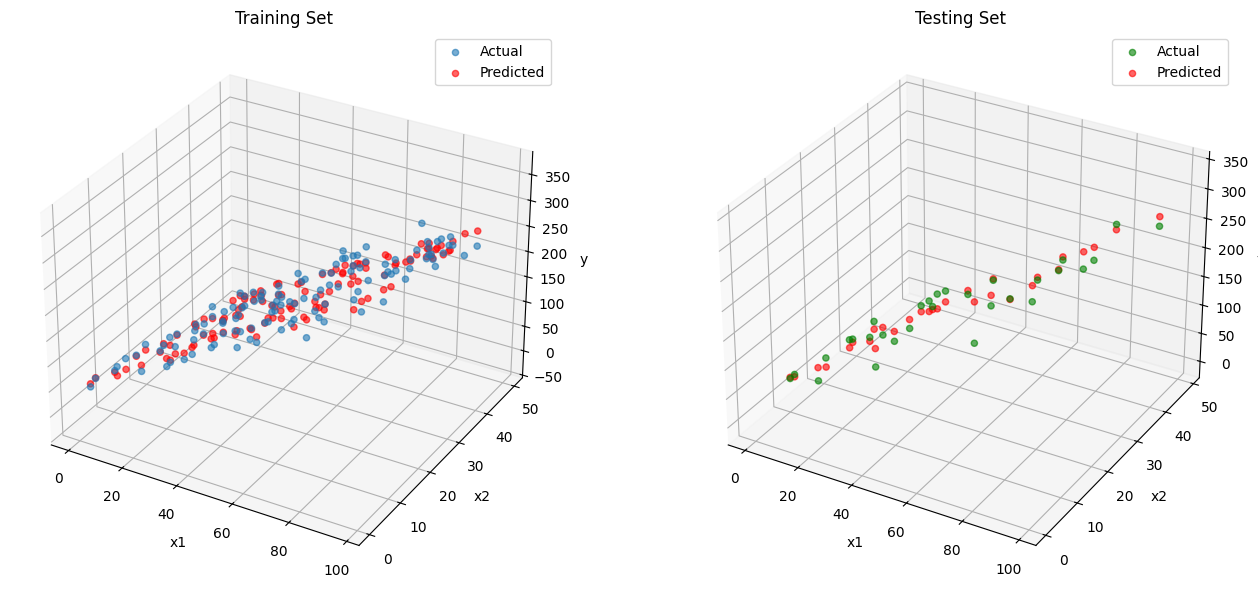

In [15]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, alpha=0.6, label='Actual')
ax1.scatter(X_train[:, 0], X_train[:, 1], y_train_pred, alpha=0.6, color='red', label='Predicted')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Training Set')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_test, alpha=0.6, color='green', label='Actual')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_test_pred, alpha=0.6, color='red', label='Predicted')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Testing Set')
ax2.legend()

plt.tight_layout()
plt.show()

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



## Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Generate Data

In [17]:
np.random.seed(42)

a = 2.0
b = -3.0
c = 50

print(f"Equation: y = {a}*x² + {b}*x + {c}")

X = np.linspace(-10, 10, 150)

y = a * X**2 + b * X + c

noise = np.random.normal(0, 15, size=y.shape)
y = y + noise

print(f"Generated {len(X)} data points")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")

Equation: y = 2.0*x² + -3.0*x + 50
Generated 150 data points
X range: [-10.00, 10.00]
y range: [10.91, 287.45]


## Transform Features using PolynomialFeatures

In [18]:
X_reshaped = X.reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_reshaped)

print(f"Original features shape: {X_reshaped.shape}")
print(f"Polynomial features shape: {X_poly.shape}")
print(f"Feature names: {poly.get_feature_names_out()}")

Original features shape: (150, 1)
Polynomial features shape: (150, 3)
Feature names: ['1' 'x0' 'x0^2']


## Split Data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

X_original = X_reshaped
X_train_orig, X_test_orig = train_test_split(X_original, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 120
Testing samples: 30


## Train The Model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

print("="*50)
print("LEARNED vs TRUE PARAMETERS")
print("="*50)
print(f"Learned a (x²): {model.coef_[2]:.4f}  | True a: {a}")
print(f"Learned b (x):  {model.coef_[1]:.4f}  | True b: {b}")
print(f"Learned c:      {model.intercept_:.4f}  | True c: {c}")
print("\nErrors:")
print(f"a error: {abs(model.coef_[2] - a):.4f}")
print(f"b error: {abs(model.coef_[1] - b):.4f}")
print(f"c error: {abs(model.intercept_ - c):.4f}")

LEARNED vs TRUE PARAMETERS
Learned a (x²): 1.9997  | True a: 2.0
Learned b (x):  -2.9586  | True b: -3.0
Learned c:      48.2515  | True c: 50

Errors:
a error: 0.0003
b error: 0.0414
c error: 1.7485


## Make Predictions

In [21]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Evaluate Model

In [22]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("MODEL EVALUATION")
print("="*50)
print(f"{'Metric':<15} {'Train':<15} {'Test':<15}")
print("-"*50)
print(f"{'MAE':<15} {train_mae:<15.4f} {test_mae:<15.4f}")
print(f"{'MSE':<15} {train_mse:<15.4f} {test_mse:<15.4f}")
print(f"{'R² Score':<15} {train_r2:<15.4f} {test_r2:<15.4f}")

MODEL EVALUATION
Metric          Train           Test           
--------------------------------------------------
MAE             11.1370         11.4454        
MSE             199.4701        194.7215       
R² Score        0.9542          0.9382         


## Model Performance Notes
The Polynomial Regression model handles the non-linear data well.

1. R² Score Analysis:
   - Train R² = 0.9542
   - Test R² = 0.9382
   - Difference: 0.0159
   
2. Error Metrics:
   - MAE and MSE are reasonably low for both sets
   - Train and test errors are close, good sign
   
3. Overfitting/Underfitting Check:
   - No overfitting: the performance gap between train and test is small,
     the model isn't just memorizing the training data
   - No underfitting: high R² scores show the model captured the
     quadratic relationship properly
   
4. Coefficient Recovery:
   - The learned coefficients match the true values pretty well
   - PolynomialFeatures successfully transformed the data to capture
     the x² relationship
   
5. Conclusion:
   - The model fits the non-linear pattern effectively
   - Using degree=2 polynomial was the right choice for this quadratic data
   - It generalizes well to new data points
   - This shows how polynomial regression can handle curves that
     simple linear regression can't

## Visualize Results

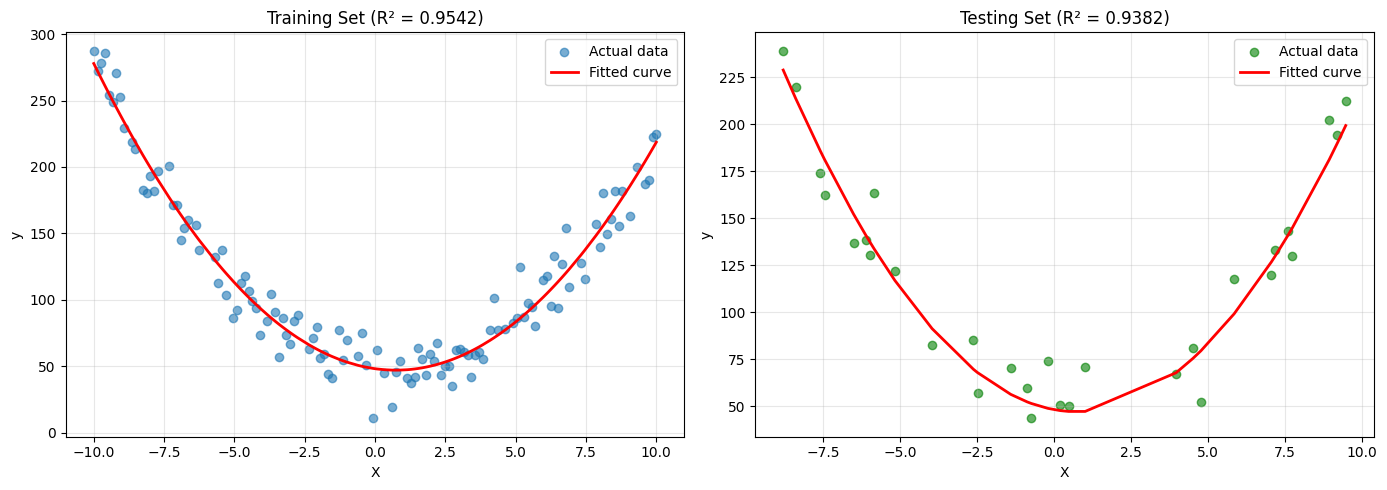

In [23]:
plt.figure(figsize=(14, 5))

sort_idx_train = X_train_orig.flatten().argsort()
sort_idx_test = X_test_orig.flatten().argsort()

plt.subplot(1, 2, 1)
plt.scatter(X_train_orig, y_train, alpha=0.6, label='Actual data')
plt.plot(X_train_orig[sort_idx_train], y_train_pred[sort_idx_train],
         color='red', linewidth=2, label='Fitted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Training Set (R² = {train_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test_orig, y_test, alpha=0.6, color='green', label='Actual data')
plt.plot(X_test_orig[sort_idx_test], y_test_pred[sort_idx_test],
         color='red', linewidth=2, label='Fitted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Testing Set (R² = {test_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [24]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

100%|██████████| 2.33M/2.33M [00:00<00:00, 45.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohitgrewal/airlines-flights-data/versions/1


In [25]:
os.listdir(path)

['airlines_flights_data.csv']

In [26]:
full_path = os.path.join(path,os.listdir(path)[0])

In [27]:
import pandas as pd
df = pd.read_csv(full_path)

In [28]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Explore Data

In [30]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [31]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [32]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [33]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [34]:
print("Numeric:", df.select_dtypes(include=['int64', 'float64']).columns.tolist())
print("Categorical:", df.select_dtypes(include=['object']).columns.tolist())

Numeric: ['index', 'duration', 'days_left', 'price']
Categorical: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [35]:
print(f"Total rows: {len(df)}")
print(f"Unique flights: {df['flight'].nunique()}")
print(f"Most common flights:")
print(df['flight'].value_counts().head(10))

Total rows: 300153
Unique flights: 1561
Most common flights:
flight
UK-706    3235
UK-772    2741
UK-720    2650
UK-836    2542
UK-822    2468
UK-828    2440
UK-874    2423
UK-832    2404
UK-826    2335
UK-860    2329
Name: count, dtype: int64


## Drop unnecessary columns



In [36]:
df = df.drop('index', axis=1)
print("Columns after dropping:")
print(df.columns.tolist())
print(f"New shape: {df.shape}")

Columns after dropping:
['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
New shape: (300153, 11)


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


## Visualization and EDA

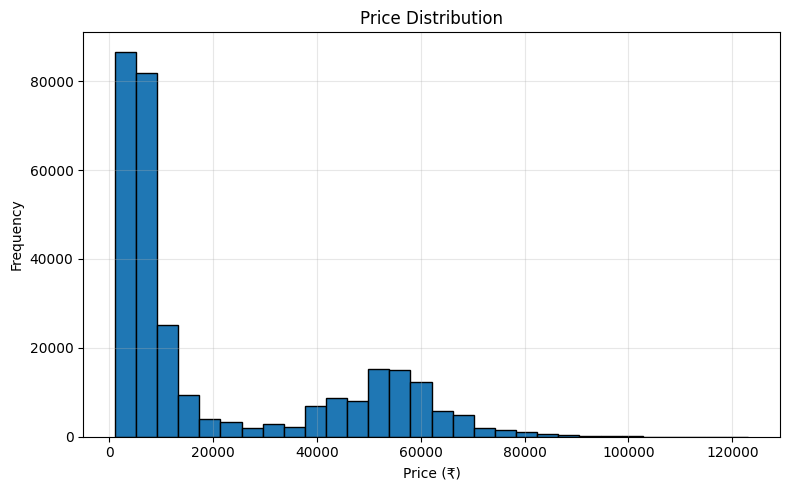

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

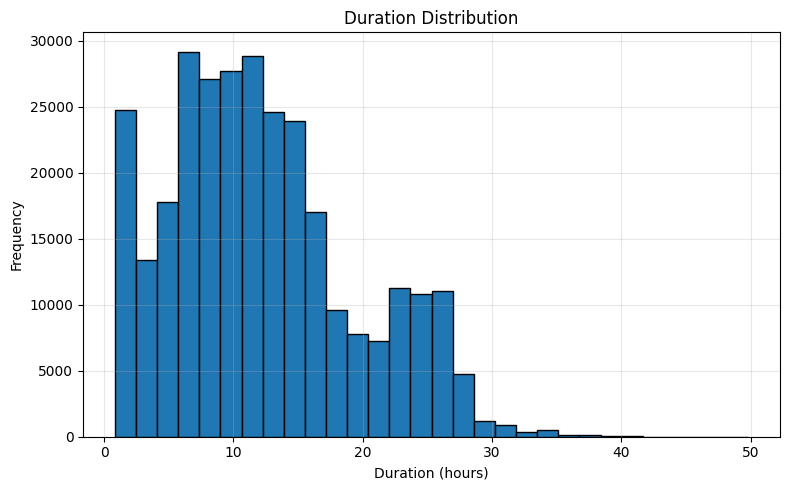

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(df['duration'], bins=30, edgecolor='black')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Duration Distribution')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

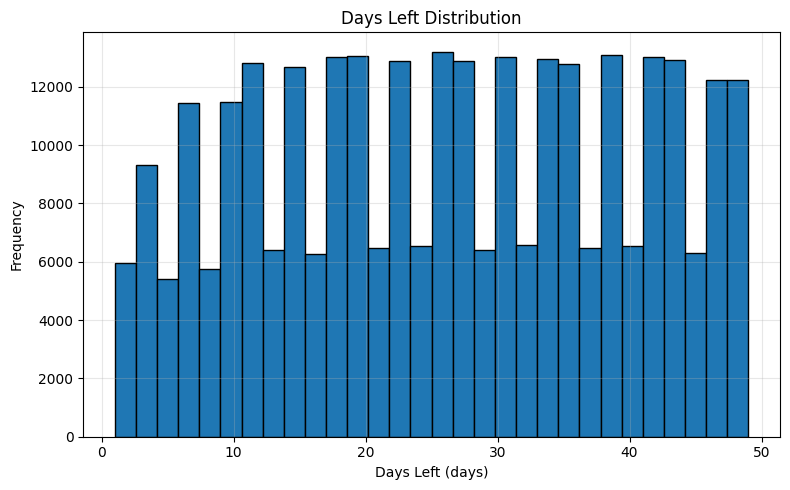

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(df['days_left'], bins=30, edgecolor='black')
plt.xlabel('Days Left (days)')
plt.ylabel('Frequency')
plt.title('Days Left Distribution')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

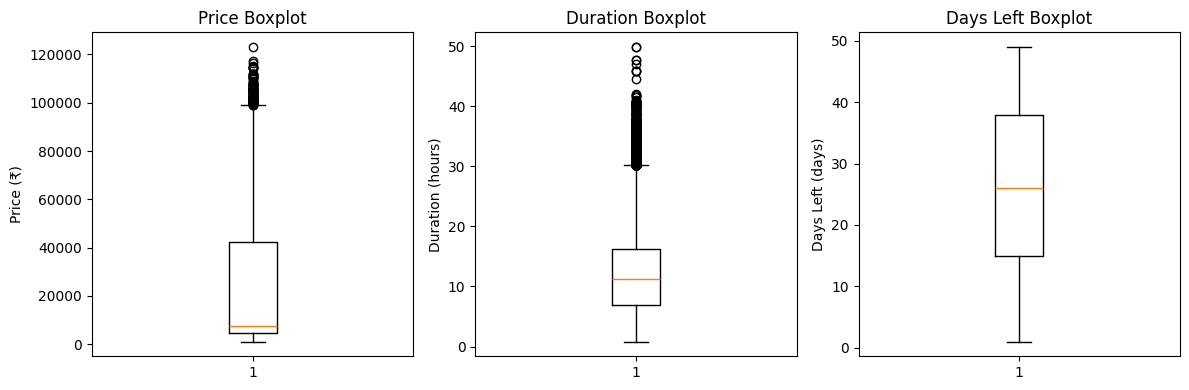

In [40]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot(df['price'])
plt.ylabel('Price (₹)')
plt.title('Price Boxplot')

plt.subplot(1, 3, 2)
plt.boxplot(df['duration'])
plt.ylabel('Duration (hours)')
plt.title('Duration Boxplot')

plt.subplot(1, 3, 3)
plt.boxplot(df['days_left'])
plt.ylabel('Days Left (days)')
plt.title('Days Left Boxplot')

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

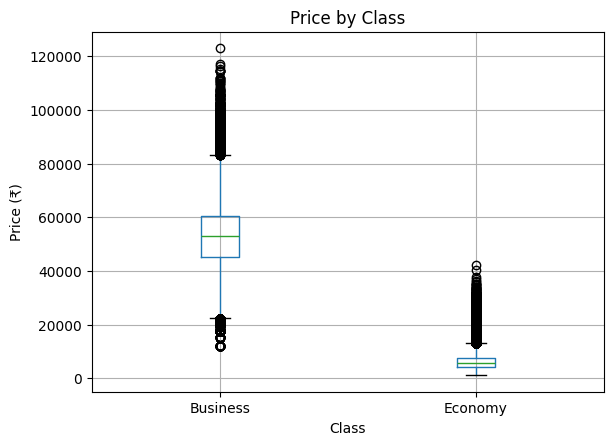

In [41]:
plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Price (₹)')
plt.title('Price by Class')
plt.show()

<Figure size 1200x500 with 0 Axes>

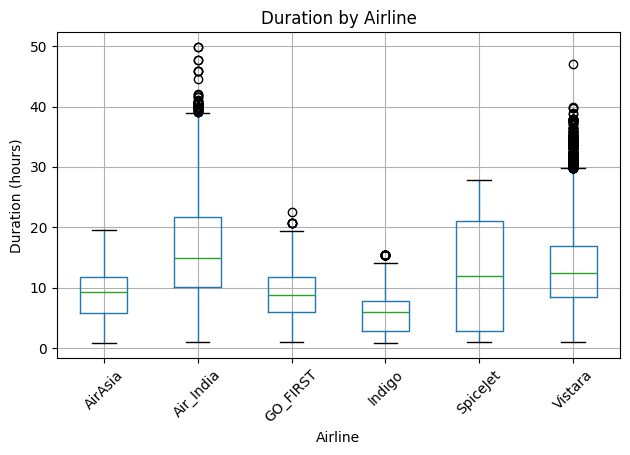

In [42]:
plt.figure(figsize=(12, 5))
df.boxplot(column='duration', by='airline', rot=45)
plt.suptitle('')
plt.xlabel('Airline')
plt.ylabel('Duration (hours)')
plt.title('Duration by Airline')
plt.tight_layout()
plt.show()

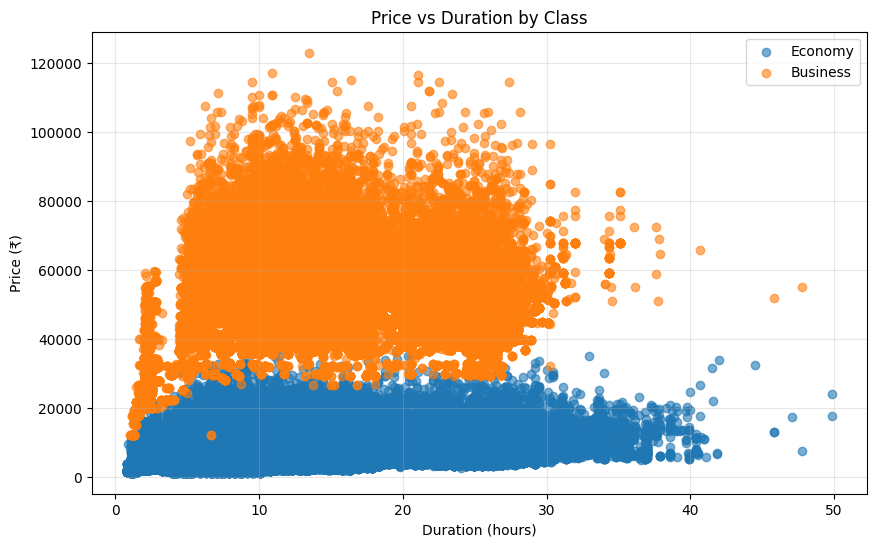

In [43]:
plt.figure(figsize=(10, 6))

for class_type in df['class'].unique():
    data = df[df['class'] == class_type]
    plt.scatter(data['duration'], data['price'], label=class_type, alpha=0.6)

plt.xlabel('Duration (hours)')
plt.ylabel('Price (₹)')
plt.title('Price vs Duration by Class')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

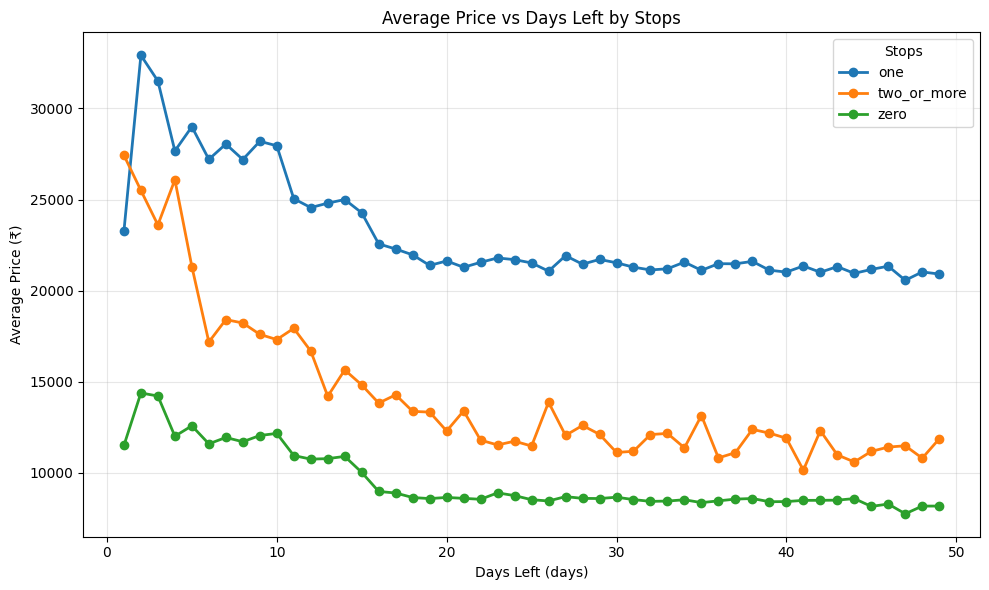

In [44]:
plt.figure(figsize=(10, 6))

grouped = df.groupby(['days_left', 'stops'])['price'].mean().reset_index()

for stop in grouped['stops'].unique():
    data = grouped[grouped['stops'] == stop]
    plt.plot(data['days_left'], data['price'], marker='o', label=stop, linewidth=2)

plt.xlabel('Days Left (days)')
plt.ylabel('Average Price (₹)')
plt.title('Average Price vs Days Left by Stops')
plt.legend(title='Stops')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

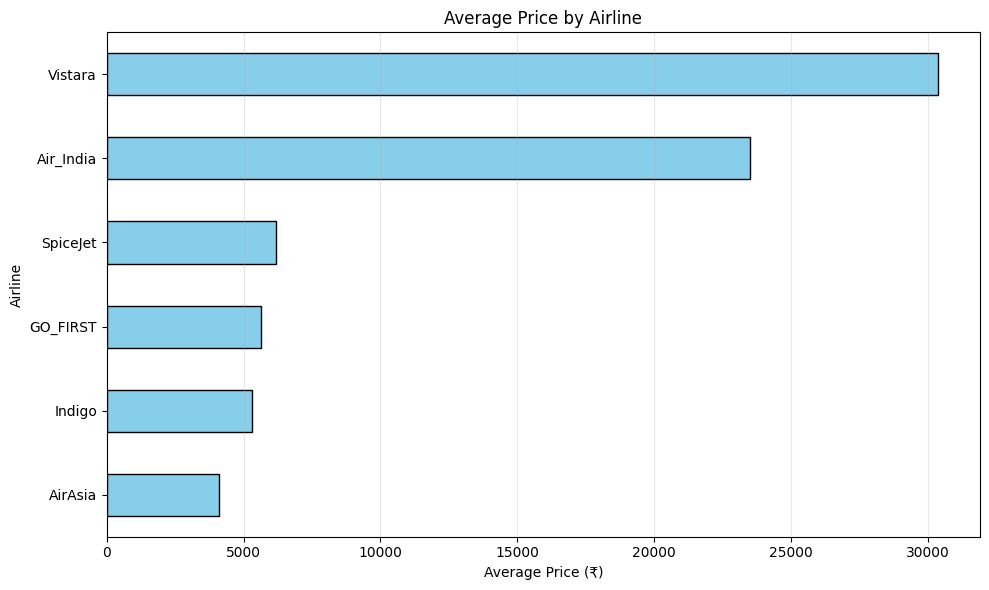

In [45]:
plt.figure(figsize=(10, 6))
avg_price = df.groupby('airline')['price'].mean().sort_values()
avg_price.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average Price (₹)')
plt.ylabel('Airline')
plt.title('Average Price by Airline')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

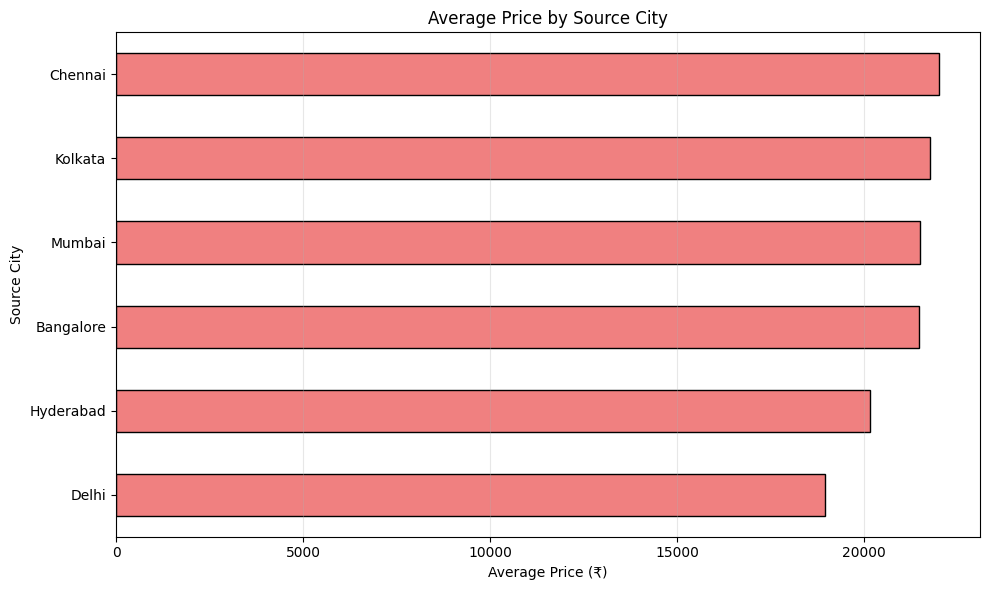

In [46]:
plt.figure(figsize=(10, 6))
avg_price = df.groupby('source_city')['price'].mean().sort_values()
avg_price.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.xlabel('Average Price (₹)')
plt.ylabel('Source City')
plt.title('Average Price by Source City')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

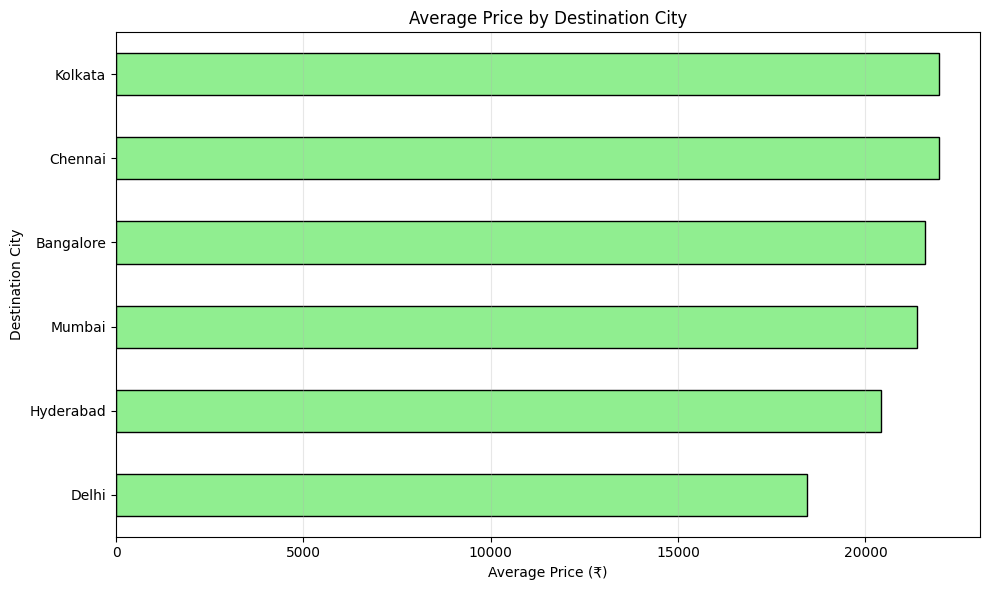

In [47]:
plt.figure(figsize=(10, 6))
avg_price = df.groupby('destination_city')['price'].mean().sort_values()
avg_price.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.xlabel('Average Price (₹)')
plt.ylabel('Destination City')
plt.title('Average Price by Destination City')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

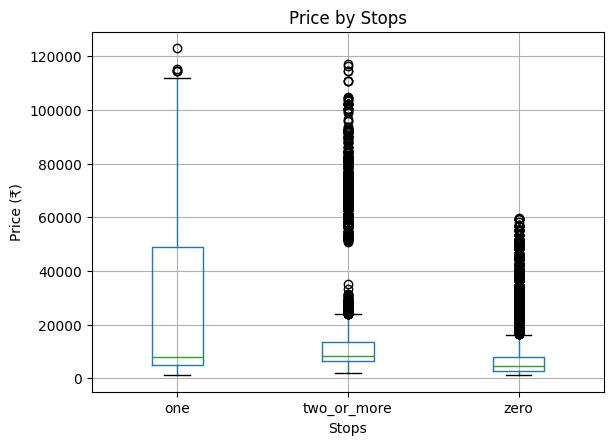

In [48]:
plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='stops')
plt.suptitle('')
plt.xlabel('Stops')
plt.ylabel('Price (₹)')
plt.title('Price by Stops')
plt.show()

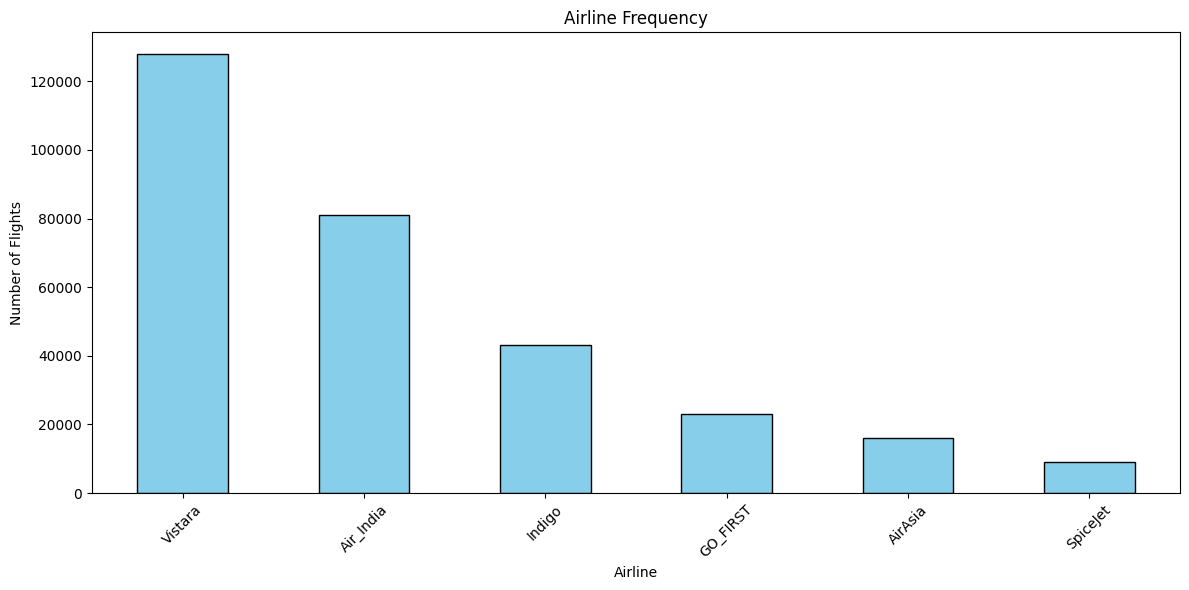

In [49]:
plt.figure(figsize=(12, 6))
df['airline'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Airline Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

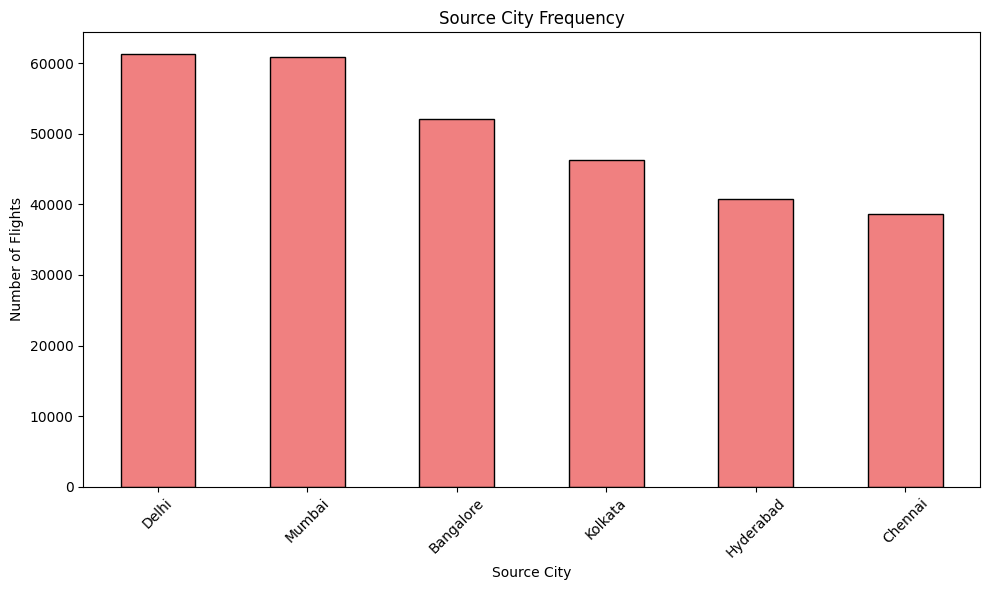

In [50]:
plt.figure(figsize=(10, 6))
df['source_city'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.title('Source City Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

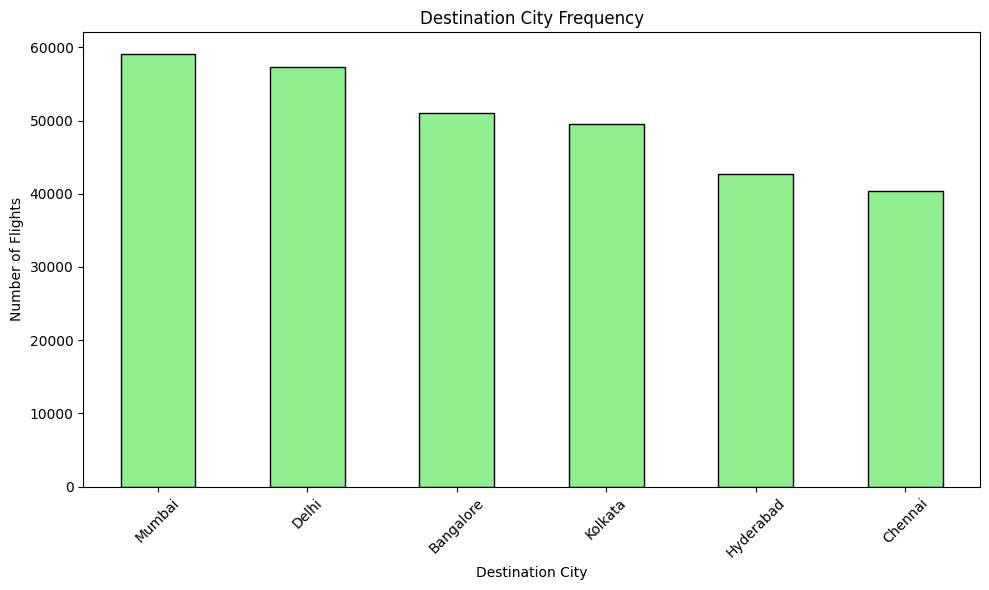

In [51]:
plt.figure(figsize=(10, 6))
df['destination_city'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Destination City')
plt.ylabel('Number of Flights')
plt.title('Destination City Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

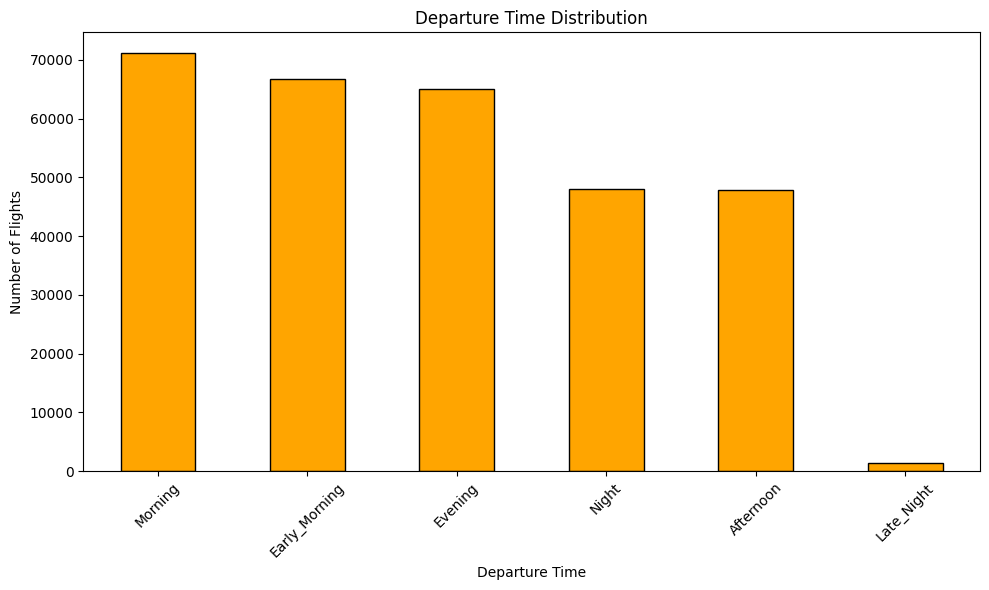

In [52]:
plt.figure(figsize=(10, 6))
df['departure_time'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.title('Departure Time Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

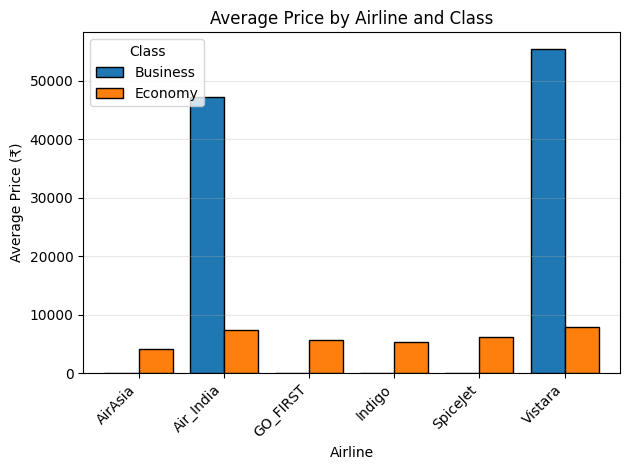

In [53]:
plt.figure(figsize=(10, 6))
grouped = df.groupby(['airline', 'class'])['price'].mean().unstack()
grouped.plot(kind='bar', edgecolor='black', width=0.8)
plt.xlabel('Airline')
plt.ylabel('Average Price (₹)')
plt.title('Average Price by Airline and Class')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class', loc='upper left')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

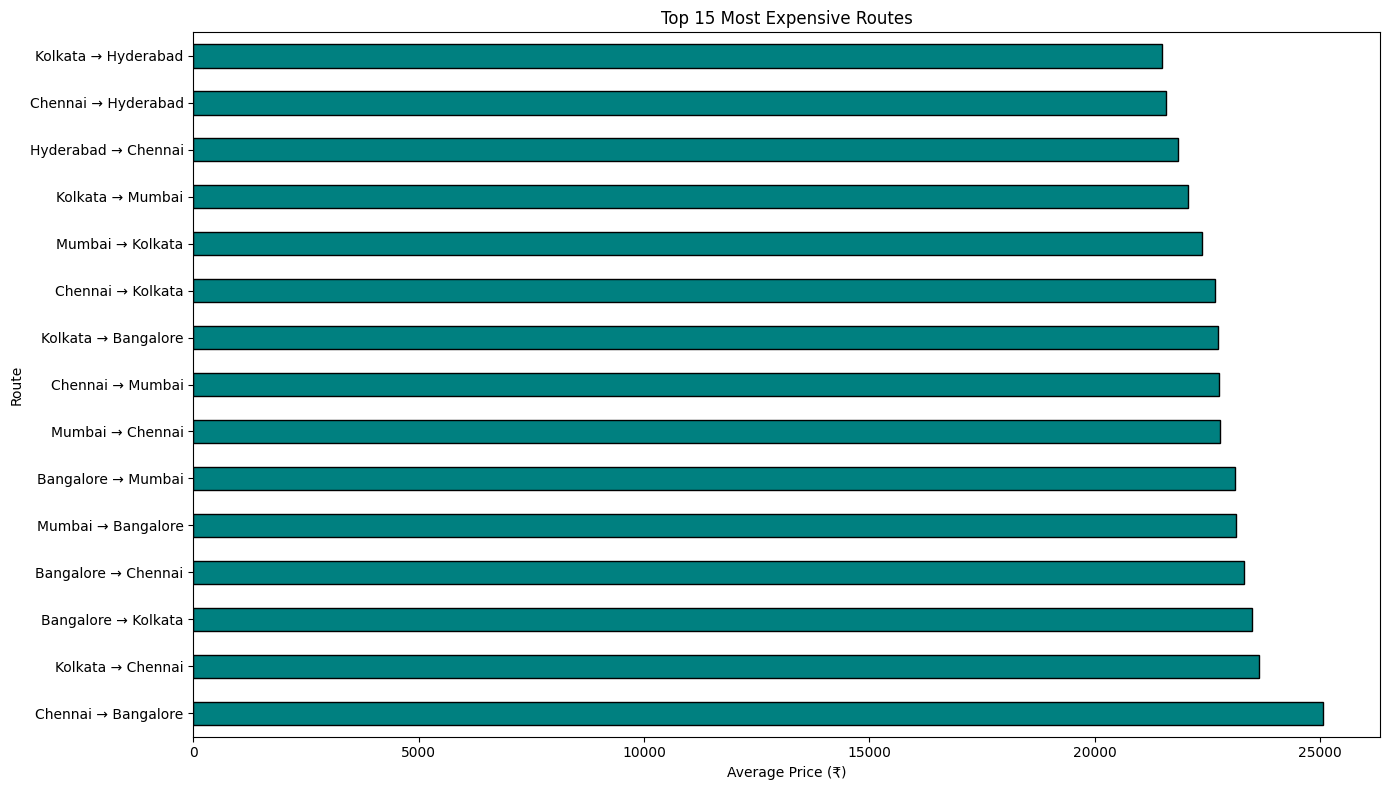

In [54]:
plt.figure(figsize=(14, 8))
df['route'] = df['source_city'] + ' → ' + df['destination_city']
route_avg = df.groupby('route')['price'].mean().sort_values(ascending=False).head(15)
route_avg.plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Average Price (₹)')
plt.ylabel('Route')
plt.title('Top 15 Most Expensive Routes')
plt.tight_layout()
plt.show()

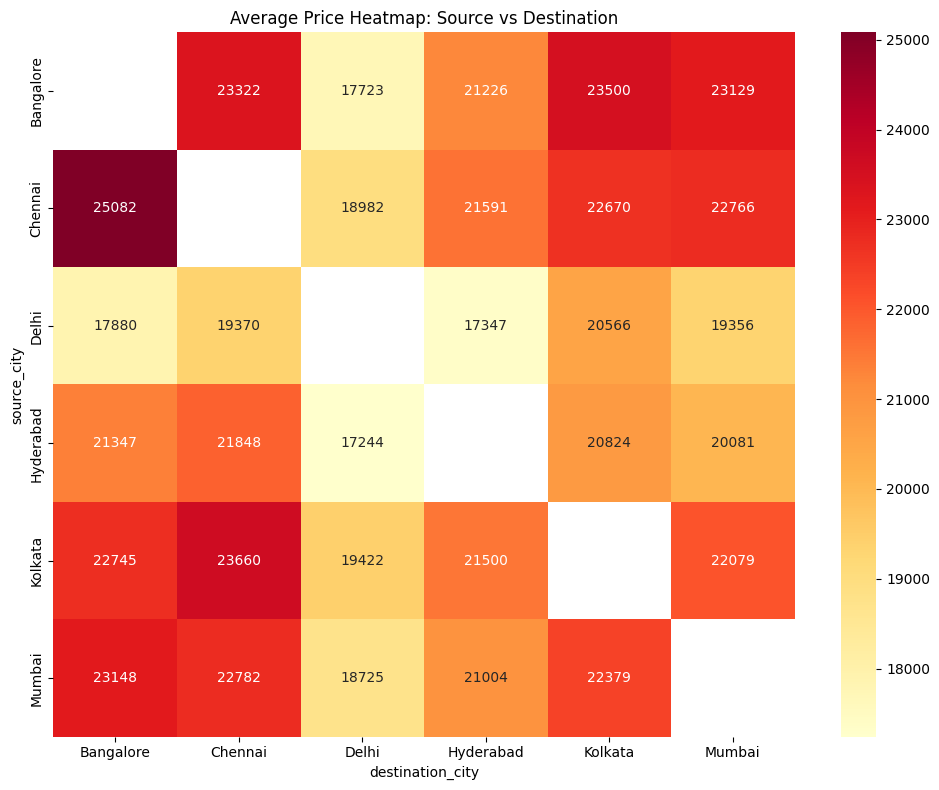

In [55]:
plt.figure(figsize=(10, 8))
pivot = df.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Price Heatmap: Source vs Destination')
plt.tight_layout()
plt.show()

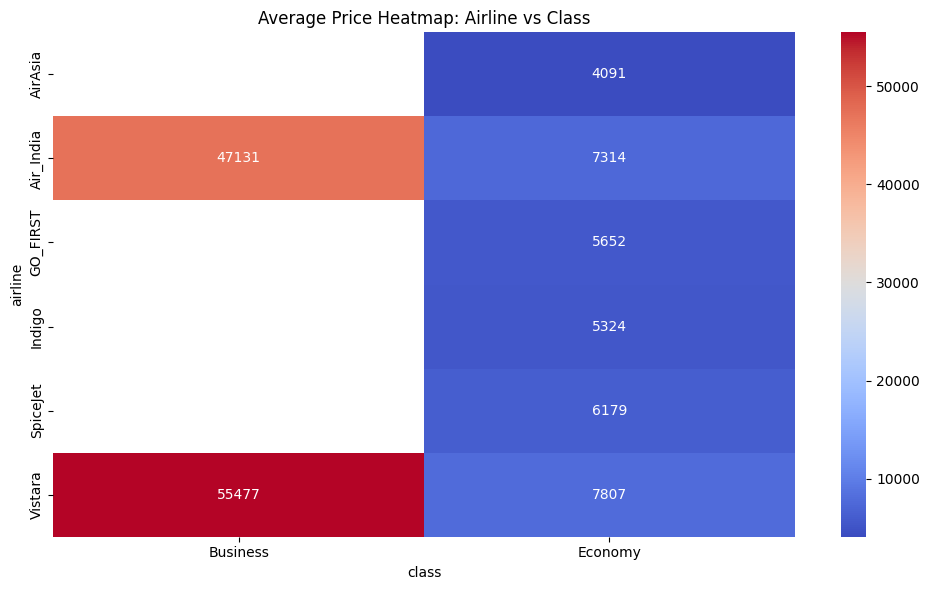

In [56]:
plt.figure(figsize=(10, 6))
pivot = df.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Average Price Heatmap: Airline vs Class')
plt.tight_layout()
plt.show()

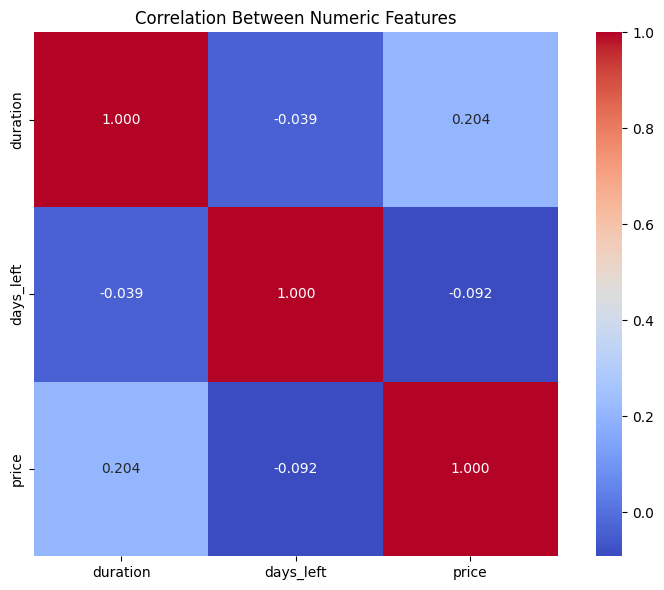

In [57]:
plt.figure(figsize=(8, 6))
corr = df[['duration', 'days_left', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f', square=True)
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

# Summary of Analysis & Insights
1. PRICE DISTRIBUTION
   - Flight prices range widely from very cheap to very expensive
   - Most prices cluster in the lower to mid range
   - There are significant outliers at the high end

2. CLASS IMPACT
   - Business class is significantly more expensive than Economy
   - Business class median price is around 3-4x Economy median
   - Both classes have considerable price variation

3. BOOKING TIMING (Days Left)
   - Prices are highest when booking last minute (1-5 days)
   - Prices drop and stabilize after about 20 days before departure
   - Best time to book: 20+ days in advance

4. NUMBER OF STOPS
   - Direct flights (zero stops) are generally cheapest
   - One-stop flights are the most expensive
   - Two or more stops fall in between
   - This is interesting - might be due to route availability

5. AIRLINE PRICING
   - Different airlines have different average price ranges
   - Some airlines focus on budget, others on premium
   - Significant variation within each airline

6. ROUTES (Source & Destination)
   - Certain city pairs are more expensive than others
   - Popular routes don't necessarily mean cheaper prices
   - Route availability varies (not all cities are connected)

7. FLIGHT DURATION
   - Longer flights tend to be more expensive
   - But duration alone doesn't fully explain price
   - Class and airline also play major roles

8. CORRELATIONS
   - Duration shows some positive correlation with price
   - Days_left shows negative correlation (closer = expensive)
   - These will be useful features for the model

9. DATA QUALITY
   - No missing values
   - No duplicates
   - Clean dataset ready for modeling
   - Large sample size (300,000+ flights)

CONCLUSION FOR MODELING:
All features appear relevant for predicting price. The categorical
variables (airline, source, destination, class, stops) show clear
price differences, and numeric features (duration, days_left) show
meaningful patterns. The data is ready for encoding and modeling.

## Encode Categorical Variables

In [58]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:")
print(categorical_cols)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"\nShape before encoding: {df.shape}")
print(f"Shape after encoding: {df_encoded.shape}")

Categorical columns to encode:
['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'route']

Shape before encoding: (300153, 12)
Shape after encoding: (300153, 1620)


## Train-Test Split

In [59]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Split: {(X_train.shape[0]/len(X))*100:.1f}% train, {(X_test.shape[0]/len(X))*100:.1f}% test")

X shape: (300153, 1619)
y shape: (300153,)
Train samples: 240122
Test samples: 60031
Split: 80.0% train, 20.0% test


## Scale Features

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully")

Features scaled successfully


## Train Model

In [61]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained successfully")
print(f"Intercept: {model.intercept_:.2f}")

Model trained successfully
Intercept: 20888.57


## Make Predictions

In [62]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Predictions completed")

Predictions completed


## Evaluate Model

In [63]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"{'Metric':<10} {'Train':<15} {'Test':<15}")
print("-"*40)
print(f"{'MAE':<10} {train_mae:<15.2f} {test_mae:<15.2f}")
print(f"{'MSE':<10} {train_mse:<15.2f} {test_mse:<15.2f}")
print(f"{'RMSE':<10} {train_rmse:<15.2f} {test_rmse:<15.2f}")
print(f"{'R²':<10} {train_r2:<15.4f} {test_r2:<15.4f}")

Metric     Train           Test           
----------------------------------------
MAE        4246.01         4243.57        
MSE        37870318.86     38192945.55    
RMSE       6153.89         6180.04        
R²         0.9265          0.9259         


## Model Performance Notes

In [64]:
print("\nModel Performance Analysis:")
print(f"""
The model explains about {test_r2*100:.1f}% of price variation in the data.

Train R²: {train_r2:.4f}
Test R²: {test_r2:.4f}
Difference: {abs(train_r2 - test_r2):.4f}

Average prediction error (RMSE): ₹{test_rmse:.0f}

{"Train and test scores are close, no major overfitting" if abs(train_r2 - test_r2) < 0.1 else "Train score is higher than test, some overfitting present"}

{"The model performs reasonably well" if test_r2 > 0.6 else "Performance could be better, consider feature engineering"}
""")


Model Performance Analysis:

The model explains about 92.6% of price variation in the data.

Train R²: 0.9265
Test R²: 0.9259
Difference: 0.0006

Average prediction error (RMSE): ₹6180

Train and test scores are close, no major overfitting

The model performs reasonably well



## Visualize Predictions

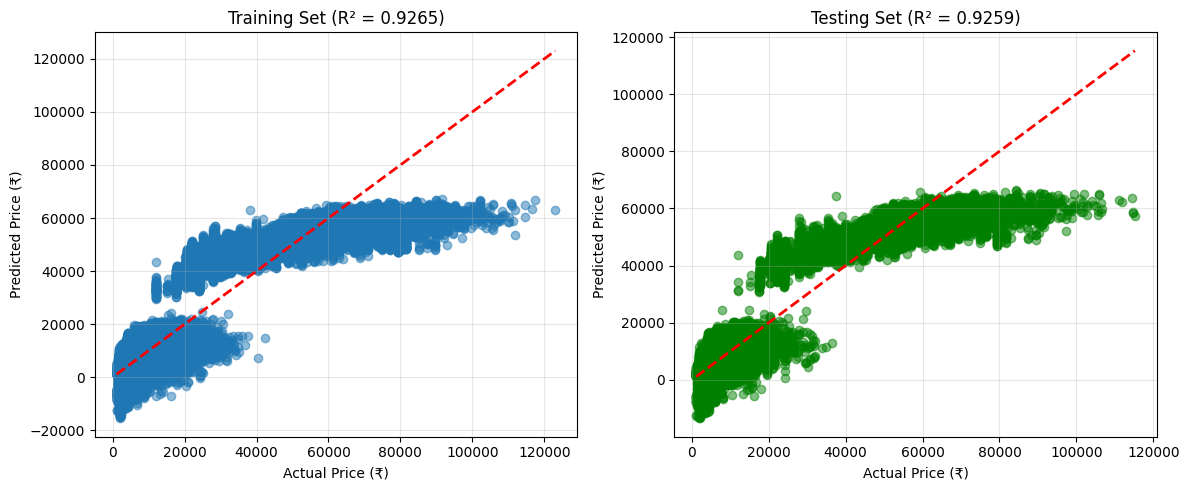

In [65]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.title(f'Training Set (R² = {train_r2:.4f})')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.title(f'Testing Set (R² = {test_r2:.4f})')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

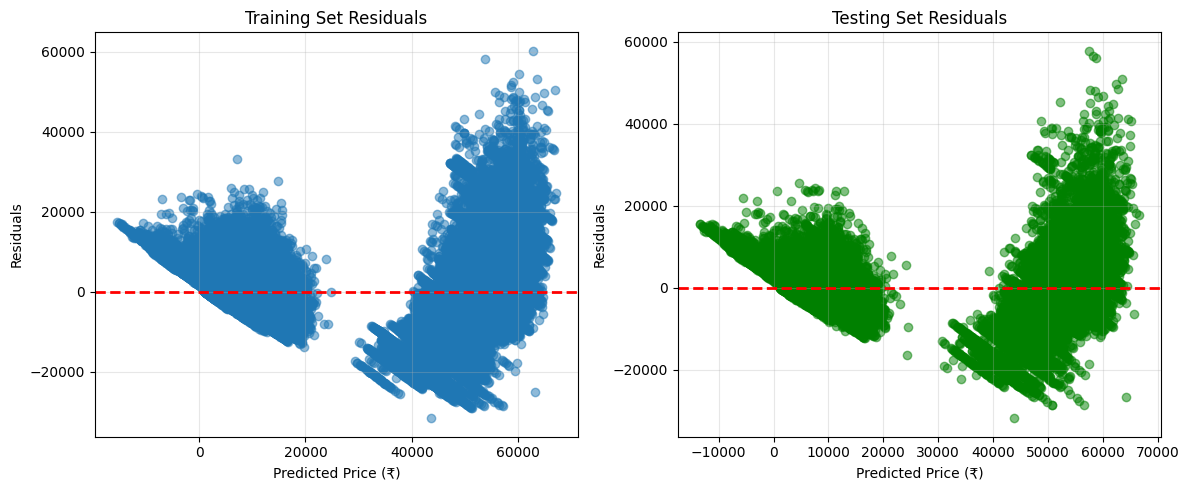

In [67]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price (₹)')
plt.ylabel('Residuals')
plt.title('Training Set Residuals')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price (₹)')
plt.ylabel('Residuals')
plt.title('Testing Set Residuals')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Save Model

In [68]:
import joblib

joblib.dump(model, 'flight_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model saved successfully")
print("Files: flight_price_model.pkl, scaler.pkl")

Model saved successfully
Files: flight_price_model.pkl, scaler.pkl


## Test Saved Model


In [70]:
loaded_model = joblib.load('flight_price_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

test_samples = loaded_model.predict(loaded_scaler.transform(X_test[:5]))

print("Testing loaded model:")
print(f"Actual: {y_test[:5].values}")
print(f"Predicted: {test_samples}")

Testing loaded model:
Actual: [ 7366 64831  6195 60160  6578]
Predicted: [ 7626.96760316 56340.44864822 12380.54499826 53975.64336214
 11535.26102375]
